# Plot Generation for **Anomaly Detection in Collider Physics via Factorized Observables**

In this notebook, we generate the bump hunting and $f_S$ sweep plots in our paper, pulling saved results from the analyses. The required plotting functions are saved in the ```util.py``` file.

In [1]:
# python library imports
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# plot style commands
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi']= 100

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from util import plot_auc_brf, dijetmass_hist, jetmass_hist

%reload_ext autoreload
%autoreload 2

### Load Data

In [2]:
auc_path = '/Users/raymondwynne/Desktop/FORCE/results/auc_sweep/'
bump_hunt_path = '/Users/raymondwynne/Desktop/FORCE/results/bump_hunt/'
bump_hunt_shuffle_path = '/Users/raymondwynne/Desktop/FORCE/results/bump_hunt_shuffle/'

auc_figure_path = '/Users/raymondwynne/Desktop/FORCE/figures/auc_sweep/'
bump_hunt_figure_path = '/Users/raymondwynne/Desktop/FORCE/figures/bump_hunt/'
bump_hunt_shuffle_figure_path = '/Users/raymondwynne/Desktop/FORCE/figures/bump_hunt_shuffle/'

### Results

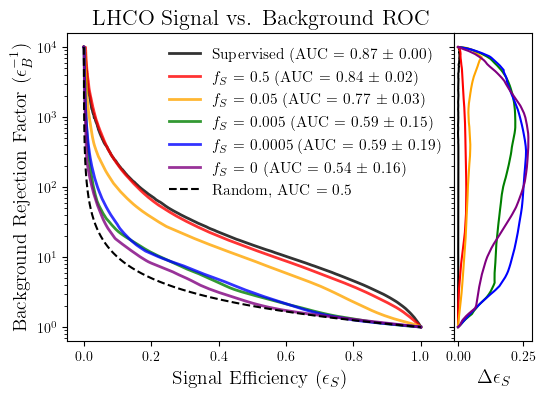

In [3]:
results = pd.read_csv(auc_path + 'fs_auc_sweep.csv', index_col=0)
results_supervised = pd.read_csv(auc_path + 'fs_auc_supervised.csv')
results = pd.concat([results, results_supervised])

numeric = list(set(results.fs))
numeric.remove('Supervised')
sorted_numeric = sorted(numeric, reverse=True)
sweep = ['Supervised'] + sorted_numeric

# plot_auc_bs(results, sweep, '', '')
plot_auc_brf(results, sweep, title='LHCO Signal vs. Background ROC', save_as=auc_figure_path+'auc_sweep')

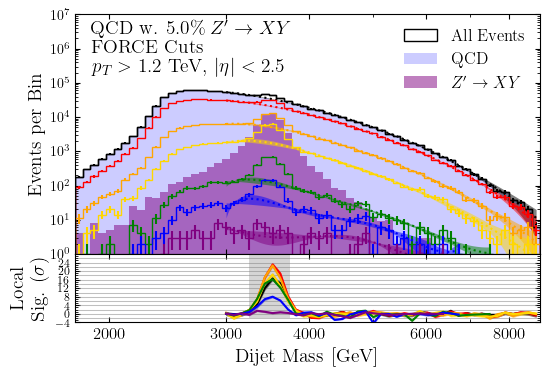

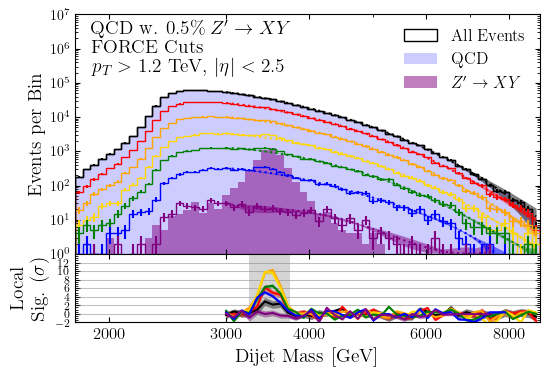

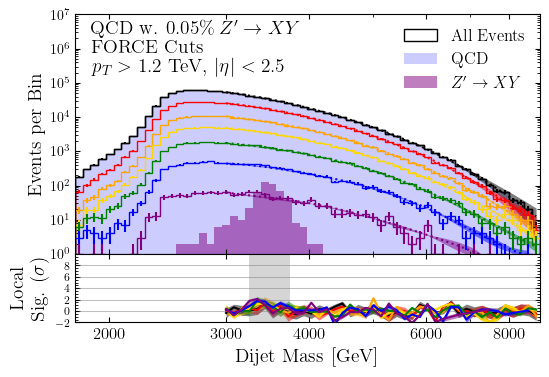

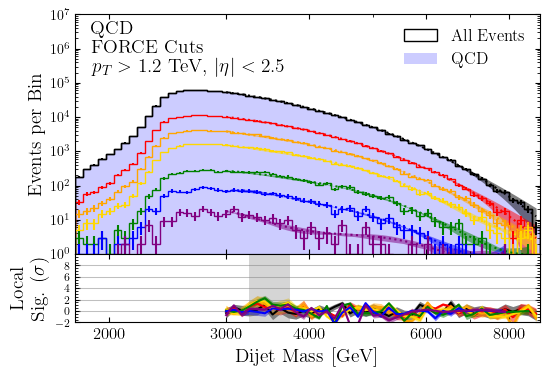

In [4]:
fractions = ['0.05', '0.005', '0.0005', '0.0']

for fraction in fractions:
    with open(bump_hunt_path + 'bump_hunt_' + fraction + '.pkl', 'rb') as f:
        bump_hunt = pickle.load(f)

    dijetmasses, labels, preds, siglow, sighigh, fs, cuts, top_sig = bump_hunt

    dijetmass_hist(*bump_hunt, shuffle=False, save_as=bump_hunt_figure_path + '/dijetmass/bump_hunt_' + fraction)

/Users/raymondwynne/Desktop/FORCE/python/util.py:527: RuntimeWarning: overflow encountered in square
  2 + yfituncs1**2))[mask2],  color=colors[i % len(colors)])
/Users/raymondwynne/Desktop/FORCE/python/util.py:529: RuntimeWarning: overflow encountered in square
  axes[1].fill_between(midbins[mask2], ((ydata - yfitvals1 - yfituncs1)/np.sqrt(yerr**2 + yfituncs1**2))[mask2],
/Users/raymondwynne/Desktop/FORCE/python/util.py:530: RuntimeWarning: overflow encountered in square
  ((ydata - yfitvals1 + yfituncs1)/np.sqrt(yerr ** 2 + yfituncs1**2))[mask2], color=colors[i % len(colors)], alpha=0.5, lw=0)
/Users/raymondwynne/Desktop/FORCE/python/util.py:520: RuntimeWarning: overflow encountered in exp
  yfits1.append(np.exp(legval(np.log(midbins), leg)))
/Users/raymondwynne/Desktop/FORCE/python/util.py:525: RuntimeWarning: invalid value encountered in subtract
  yfituncs1 = np.max(np.abs(yfits1 - yfitvals1[np.newaxis, :]), axis=0)


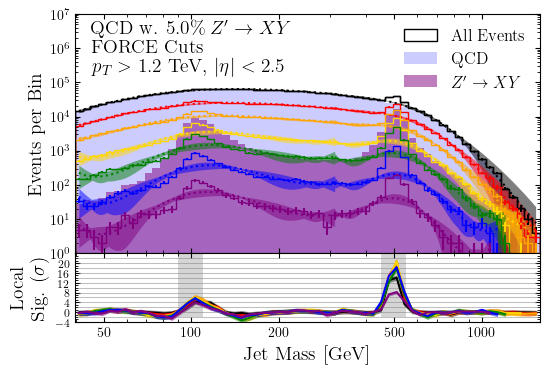

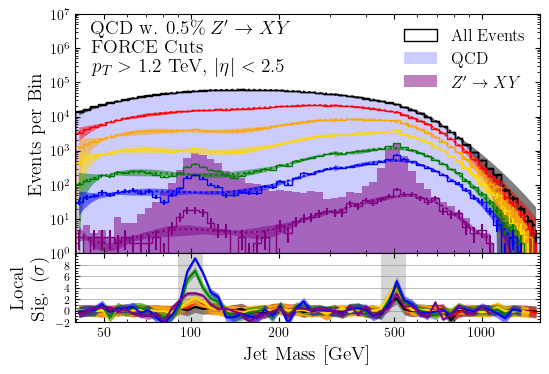

/Users/raymondwynne/Desktop/FORCE/python/util.py:529: RuntimeWarning: invalid value encountered in divide
  axes[1].fill_between(midbins[mask2], ((ydata - yfitvals1 - yfituncs1)/np.sqrt(yerr**2 + yfituncs1**2))[mask2],
/Users/raymondwynne/Desktop/FORCE/python/util.py:530: RuntimeWarning: invalid value encountered in divide
  ((ydata - yfitvals1 + yfituncs1)/np.sqrt(yerr ** 2 + yfituncs1**2))[mask2], color=colors[i % len(colors)], alpha=0.5, lw=0)


In [5]:
fractions = ['0.05', '0.005', '0.0005', '0.0']

for fraction in fractions:
    
    with open(bump_hunt_path + 'jetmass_bump_hunt_' + fraction + '.pkl', 'rb') as f:
        jetmass_bump_hunt = pickle.load(f)
    efps, preds, labels, fs, cuts, top_sig = jetmass_bump_hunt

    jetmass_hist(*jetmass_bump_hunt, shuffle=False, save_as=bump_hunt_figure_path + '/jetmass/jetmass_bump_hunt_' + fraction)

### Shuffled Results

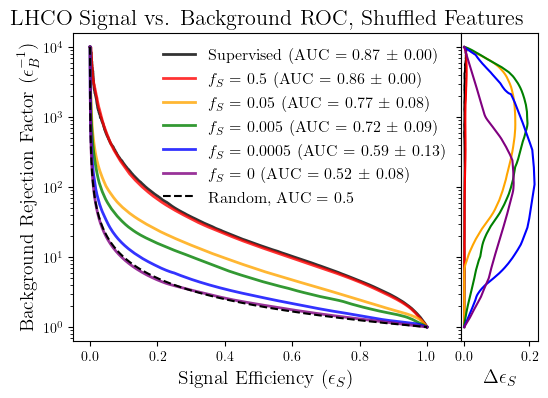

In [ ]:
results_shuffle = pd.read_csv(auc_path + 'fs_auc_shuffle_sweep.csv', index_col=0)
results_supervised = pd.read_csv('/Users/raymondwynne/Desktop/FORCE_clean/results/auc_sweep/fs_auc_supervised.csv')
results_shuffle = pd.concat([results_shuffle, results_supervised])

numeric = list(set(results_shuffle.fs))
numeric.remove('Supervised')
sorted_numeric = sorted(numeric, reverse=True)
sweep = ['Supervised'] + sorted_numeric

# plot_auc_bs(results_shuffle, sweep, '', '')
plot_auc_brf(results_shuffle, sweep, shuffle=True, title='LHCO Signal vs. Background ROC, Shuffled Features', save_as=auc_figure_path+'auc_sweep_shuffle')

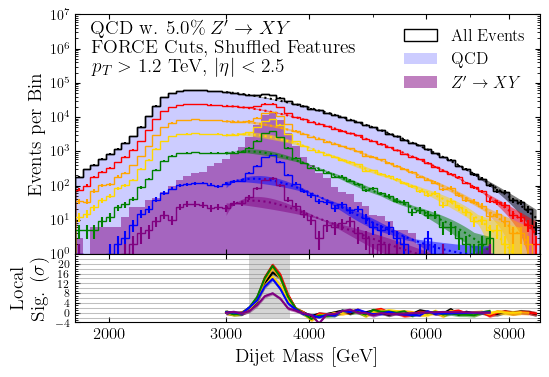

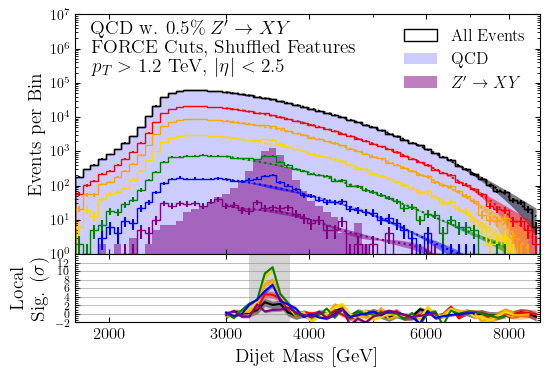

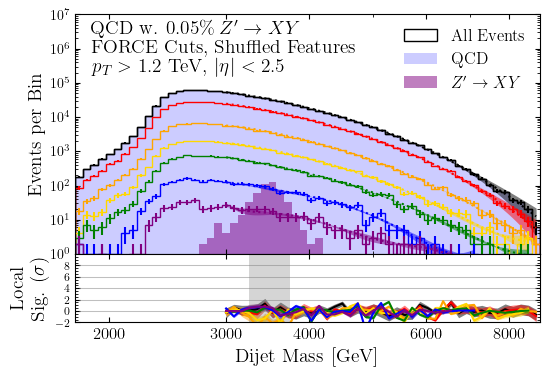

/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:782: RuntimeWarning: overflow encountered in square
  2 + yfituncs1**2))[mask1],  color=colors[i % len(colors)])
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:786: RuntimeWarning: overflow encountered in square
  axes[1].fill_between(midbins[mask1], ((ydata - yfitvals1 - yfituncs1)/np.sqrt(yerr**2 + yfituncs1**2))[mask1],
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:787: RuntimeWarning: overflow encountered in square
  ((ydata - yfitvals1 + yfituncs1)/np.sqrt(yerr ** 2 + yfituncs1**2))[mask1], color=colors[i % len(colors)], alpha=0.5, lw=0)
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:793: RuntimeWarning: overflow encountered in square
  (((ydata - yfitvals1)/np.sqrt(yerr**2 + yfituncs1**2))).tolist())
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:795: RuntimeWarning: overflow encountered in square
  (((ydata - yfitvals1)/np.sqrt(yerr**2 + yfituncs1**2))[outmask]).tolist())


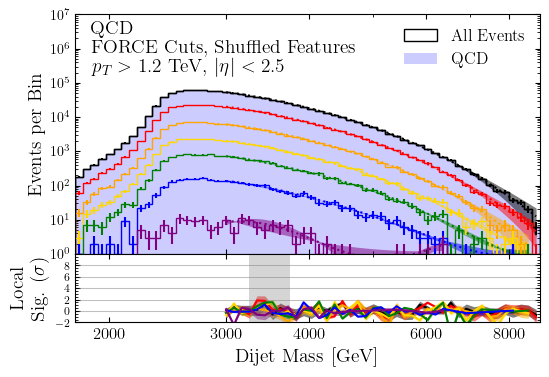

In [ ]:
fractions = ['0.05', '0.005', '0.0005', '0.0']

for fraction in fractions:
    
    with open(bump_hunt_shuffle_path + 'bump_hunt_shuffle_' + fraction + '.pkl', 'rb') as f:
        bump_hunt = pickle.load(f)

    dijetmasses, labels, preds, siglow, sighigh, fs, cuts, top_sig = bump_hunt

    dijetmass_hist(*bump_hunt, shuffle=True, save_as=bump_hunt_shuffle_figure_path + '/dijetmass/bump_hunt_shuffle_' + fraction)

/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:592: RuntimeWarning: overflow encountered in square
  2 + yfituncs1**2))[mask2],  color=colors[i % len(colors)])
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:594: RuntimeWarning: overflow encountered in square
  axes[1].fill_between(midbins[mask2], ((ydata - yfitvals1 - yfituncs1)/np.sqrt(yerr**2 + yfituncs1**2))[mask2],
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:595: RuntimeWarning: overflow encountered in square
  ((ydata - yfitvals1 + yfituncs1)/np.sqrt(yerr ** 2 + yfituncs1**2))[mask2], color=colors[i % len(colors)], alpha=0.5, lw=0)
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:585: RuntimeWarning: overflow encountered in exp
  yfits1.append(np.exp(legval(np.log(midbins), leg)))
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:590: RuntimeWarning: invalid value encountered in subtract
  yfituncs1 = np.max(np.abs(yfits1 - yfitvals1[np.newaxis, :]), axis=0)
/Users/raymondwynne/Desktop/FORCE_c

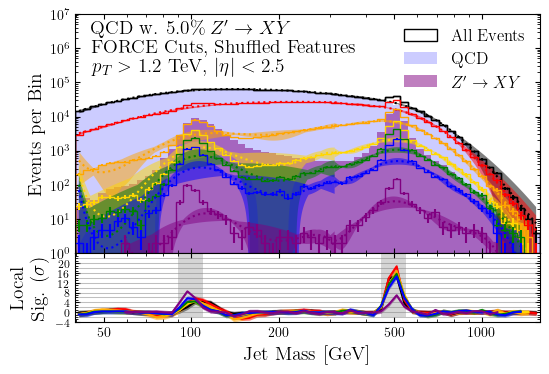

/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:594: RuntimeWarning: invalid value encountered in divide
  axes[1].fill_between(midbins[mask2], ((ydata - yfitvals1 - yfituncs1)/np.sqrt(yerr**2 + yfituncs1**2))[mask2],
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:595: RuntimeWarning: invalid value encountered in divide
  ((ydata - yfitvals1 + yfituncs1)/np.sqrt(yerr ** 2 + yfituncs1**2))[mask2], color=colors[i % len(colors)], alpha=0.5, lw=0)


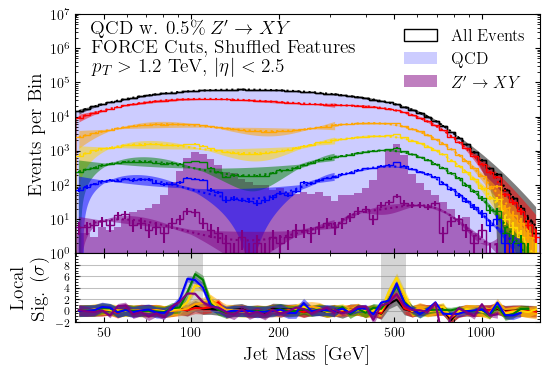

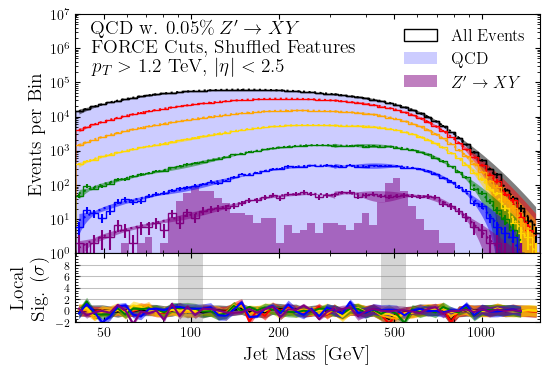

/Users/raymondwynne/opt/miniforge3/envs/tf/lib/python3.10/site-packages/numpy/polynomial/legendre.py:1412: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:591: RuntimeWarning: divide by zero encountered in divide
  axes[1].plot(midbins[mask2], ((ydata - yfitvals1)/np.sqrt(yerr **
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:594: RuntimeWarning: divide by zero encountered in divide
  axes[1].fill_between(midbins[mask2], ((ydata - yfitvals1 - yfituncs1)/np.sqrt(yerr**2 + yfituncs1**2))[mask2],
/Users/raymondwynne/Desktop/FORCE_clean/python/util.py:595: RuntimeWarning: divide by zero encountered in divide
  ((ydata - yfitvals1 + yfituncs1)/np.sqrt(yerr ** 2 + yfituncs1**2))[mask2], color=colors[i % len(colors)], alpha=0.5, lw=0)


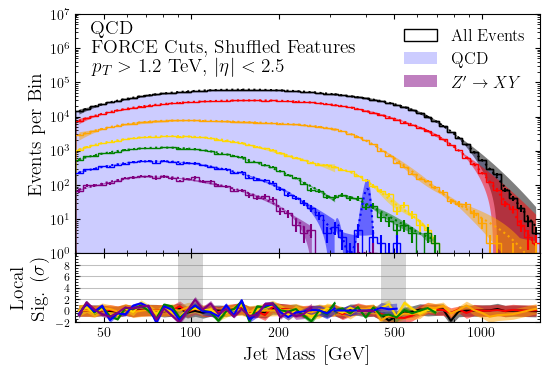

In [ ]:
fractions = ['0.05', '0.005', '0.0005', '0.0']

for fraction in fractions:
    
    with open(bump_hunt_shuffle_path + 'jetmass_bump_hunt_shuffle_' + fraction + '.pkl', 'rb') as f:
        jetmass_bump_hunt = pickle.load(f)

    efps, preds, labels, fs, cuts, top_sig = jetmass_bump_hunt

    jetmass_hist(*jetmass_bump_hunt, shuffle=True, save_as=bump_hunt_shuffle_figure_path + '/jetmass/jetmass_bump_hunt_shuffle_' + fraction)